# Import section

In [103]:
# Import package
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import StratifiedShuffleSplit
# for Deploy our model
from pandas_profiling import ProfileReport
import pickle

## import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

# Load data

In [104]:
df = pd.read_csv("train.csv")

In [105]:
# data head
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [106]:
# data shape
df.shape

(614, 13)

In [107]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# data preprocessing

In [108]:
# missing values for each column
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [109]:
# describe data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [110]:
# describe catecorized data 
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002181,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [111]:
# Separete data into 
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

In [112]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [113]:
# convert into table
cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

In [114]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [115]:
# Replace missing values in cat_data by the freq value
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [116]:
# Replace missing values in num_data by the near value
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [117]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [118]:
# convert target column
target_value = {'Y':1,'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [119]:
# preprocessing other cat columns
le = LabelEncoder()
for i in cat_data:
    cat_data[i] =le.fit_transform(cat_data[i])

cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [120]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Loan_ID        614 non-null    int32
 1   Gender         614 non-null    int32
 2   Married        614 non-null    int32
 3   Dependents     614 non-null    int32
 4   Education      614 non-null    int32
 5   Self_Employed  614 non-null    int32
 6   Property_Area  614 non-null    int32
dtypes: int32(7)
memory usage: 16.9 KB


In [121]:
# delete loan_id column
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [122]:
# concatnate cat_data and num_data

X = pd.concat([cat_data,num_data],axis=1)
y = target

In [123]:
X.shape

(614, 11)

# EDA

In [124]:
## Start by Trget Variable
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [125]:
## database for EDA
df = pd.concat([cat_data,num_data,target],axis=1)

yes : 0.3127035830618892
no : 0.6872964169381107


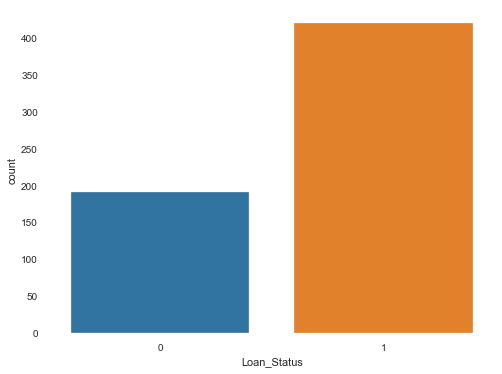

In [126]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0]/ len(target)
no = target.value_counts()[1] / len(target)
print(f'yes : {yes}')
print(f'no : {no}')

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


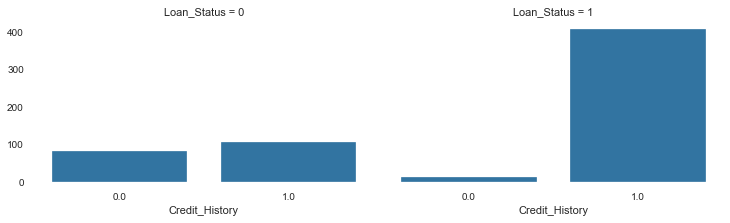

In [127]:
# Credit history
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

on remarque que les gens qui ont deja pris un credit ayant grand proba d'avoir un autre

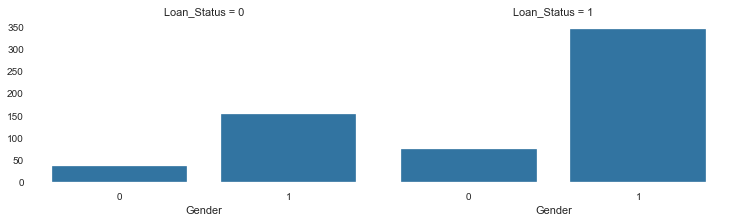

In [128]:
# Gender 
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

on remarque que les hommes ayant grand proba d'avoir un credit

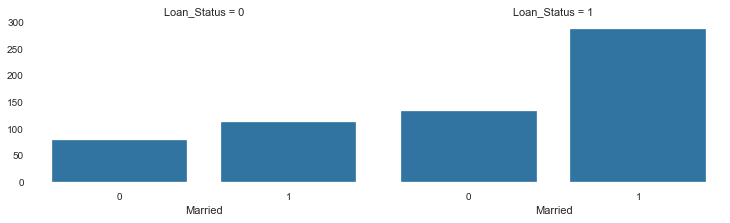

In [129]:
# Married 
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

marrie ou pas c est vraimment fait un #

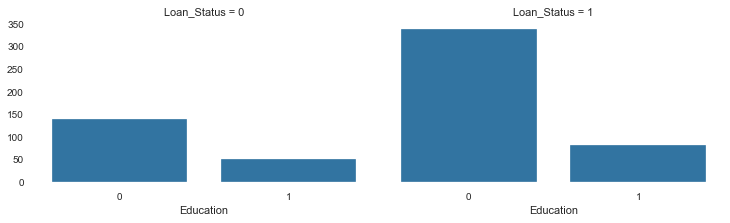

In [130]:
# Education 
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

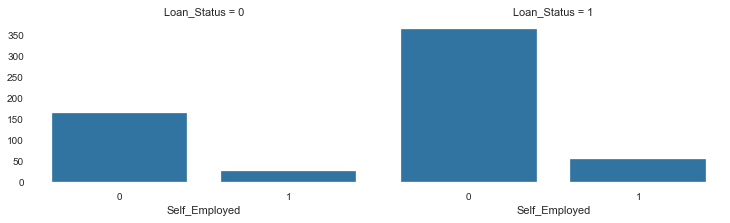

In [131]:
# Self_Employed 
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

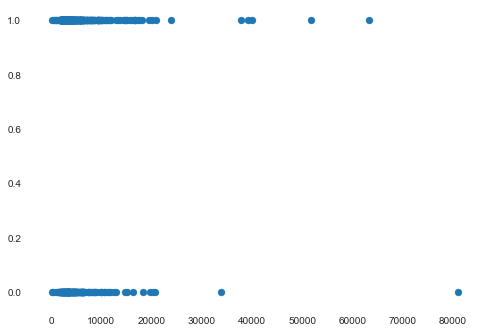

In [132]:
# revenue de dommandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

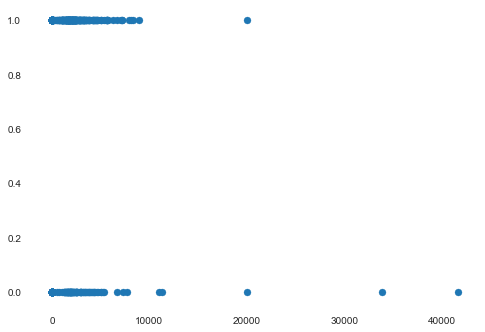

In [133]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [134]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


# Build Models

In [135]:
## split data into train && test
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train,test in sss.split(X,y):
    X_train, X_test = X.iloc[train],X.iloc[test]
    y_train, y_test = y.iloc[train],y.iloc[test]
    
print('X_train shape ',X_train.shape)
print('y_train shape ',y_train.shape)
print('X_test shape ',X_test.shape)
print('y_test shape ',y_test.shape)

X_train shape  (491, 11)
y_train shape  (491,)
X_test shape  (123, 11)
y_test shape  (123,)


In [173]:
## craete 3 models for take the best
models ={
    'lg':LogisticRegression(random_state=42),
    'knn':KNeighborsClassifier(),
    'dt':DecisionTreeClassifier(max_depth=1,random_state=42)
}

## precision function
def accu(y, yhat ,retu=True):
    acc = accuracy_score(y, yhat)
    if retu:
        return acc
    else:
        print('precision is : {acc}')
        
##applicate model funct
def train_test_eval(models, X_train,y_train,X_test, y_test):
    for name,model in models.items():
        model.fit(X_train,y_train)
        acc = accu(y_test,model.predict(X_test),retu=True)
        print(f'{name}  accuracy :{acc}')
        print('--'*30)

    
    
    
    

In [174]:
## turn 
train_test_eval(models, X_train,y_train,X_test, y_test)


lg  accuracy :0.8536585365853658
------------------------------------------------------------
knn  accuracy :0.6504065040650406
------------------------------------------------------------
dt  accuracy :0.8455284552845529
------------------------------------------------------------


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## craetenew data base for deploy

In [178]:
X_2 = X[['Credit_History','Married','CoapplicantIncome']]

In [179]:
## split data into train && test
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train,test in sss.split(X_2,y):
    X_train, X_test = X_2.iloc[train],X_2.iloc[test]
    y_train, y_test = y.iloc[train],y.iloc[test]
    
print('X_train shape ',X_train.shape)
print('y_train shape ',y_train.shape)
print('X_test shape ',X_test.shape)
print('y_test shape ',y_test.shape)

X_train shape  (491, 3)
y_train shape  (491,)
X_test shape  (123, 3)
y_test shape  (123,)


In [180]:
train_test_eval(models, X_train,y_train,X_test, y_test)

lg  accuracy :0.8536585365853658
------------------------------------------------------------
knn  accuracy :0.6991869918699187
------------------------------------------------------------
dt  accuracy :0.8455284552845529
------------------------------------------------------------


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
